# Regression
#### Regression is used to predict outputs that are continuous. The outputs are quantities that can be flexibly determined based on the inputs of the model rather than being confined to a set of possible labels.

For example:

Predict the height of a potted plant from the amount of rainfall

Predict salary based on someone’s age and availability of high-speed internet

Predict a car’s MPG (miles per gallon) based on size and model year

#### Linear regression is the most popular regression algorithm. It is often underrated because of its relative simplicity. In a business setting, it could be used to predict the likelihood that a customer will churn or the revenue a customer will generate. More complex models may fit this data better, at the cost of losing simplicity.

# Linear Regression

#### The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs. The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set of data best, we are performing Linear Regression

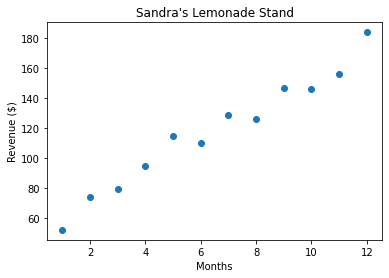

In [1]:
import matplotlib.pyplot as plt

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

plt.plot(months, revenue, "o")

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()

#### Points and Lines

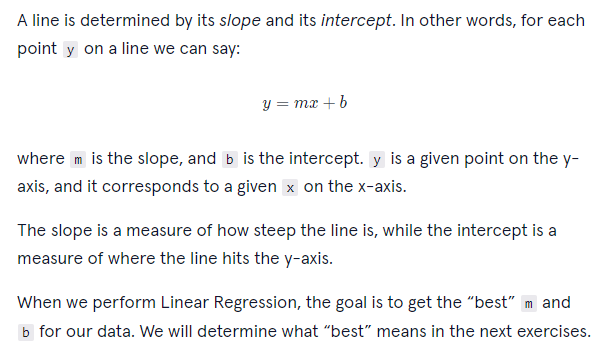

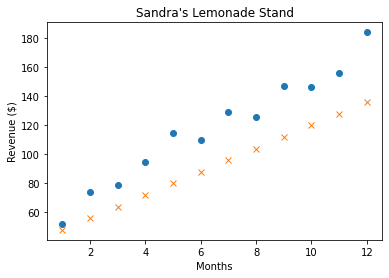

In [2]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 8
#intercept:
b = 40

y = [m*months + b for months in months]

plt.plot(months, revenue, "o")
plt.plot(months, y, 'x')

plt.title("Sandra's Lemonade Stand")

plt.xlabel("Months")
plt.ylabel("Revenue ($)")

plt.show()


#### Loss
When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:
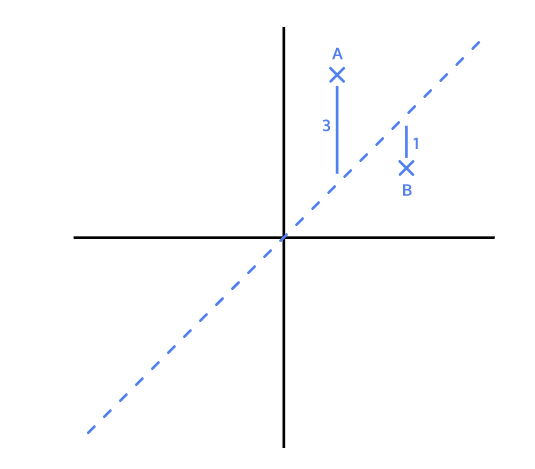
In this example:

* For point A, the squared distance is 9 (3²)
* For point B, the squared distance is 1 (1²)

So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.

In [3]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted1 = [m1*x + b1 for x in x]
y_predicted2 = [m2*x + b2 for x in x]

total_loss1 = 0
total_loss2 = 0

for i in range(len(y)):
  total_loss1 += (y[i]-y_predicted1[i])**2

for i in range(len(y)):
  total_loss2 += (y[i]-y_predicted2[i])**2

print('total loss 1:',total_loss1)
print('total loss 2:',total_loss2)

if total_loss1 <= total_loss2:
  better_fit = 1
else :
  better_fit = 2

print('better_fit:', better_fit)

total loss 1: 17
total loss 2: 13.5
better_fit: 2


#### Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom:
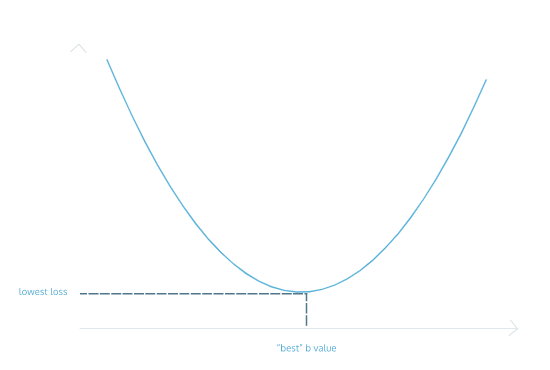
The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be:
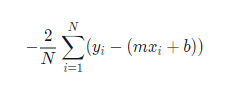
* N is the number of points we have in our dataset
* m is the current gradient guess
* b is the current intercept guess

Basically:

* we find the sum of y_value - (m*x_value + b) for all the y_values and x_values we have
* and then we multiply the sum by a factor of -2/N. N is the number of points we have.

In [4]:
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

print(get_gradient_at_b([1,2], [3,4], 1,1))

-2.0


#### Gradient Descent for Slope

We have a function to find the gradient of b at every point. To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:
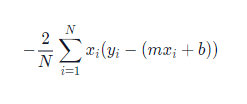

Once more:

* N is the number of points you have in your dataset
* m is the current gradient guess
* b is the current intercept guess

To find the m gradient:

* we find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values we have
* and then we multiply the sum by a factor of -2/N. N is the number of points we have.

Once we have a way to calculate both the m gradient and the b gradient, we’ll be able to follow both of those gradients downwards to the point of lowest loss for both the m value and the b value. Then, we’ll have the best m and the best b to fit our data!

In [8]:
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient


print(get_gradient_at_m([1,2], [3,4], 1,1))

-3.0


#### Find Slope and intercept at learning rate

In [9]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]


#### Convergence

How do we know when we should stop changing the parameters m and b? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters m and b.

#### Learning Rate

We want our program to be able to iteratively learn what the best m and b values are. So for each m and b pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go.

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge! Oh no!

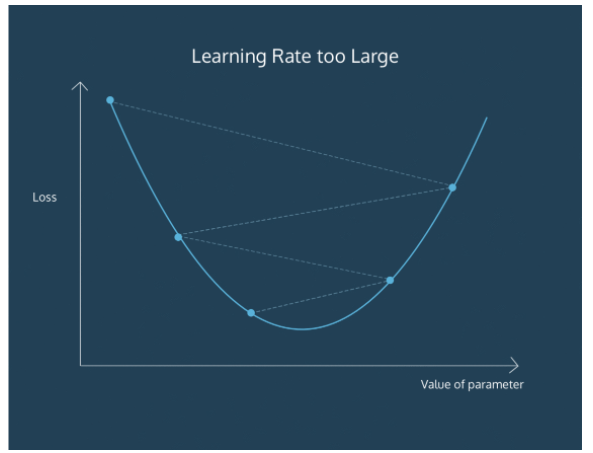

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

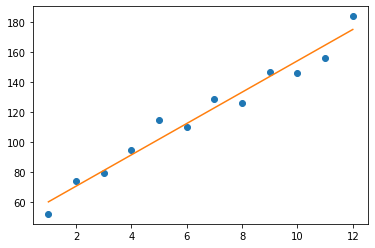

In [11]:
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations): # loop that runs num_iter times
    b, m = step_gradient(b, m, x, y, learning_rate)
  return b, m


#with a learning rate of 0.01 and 1000 iterations.
b, m = gradient_descent(months, revenue, 0.01, 1000)


y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()


# LinearRegression funcition in Scikit-Learn

In [14]:
from sklearn.linear_model import LinearRegression

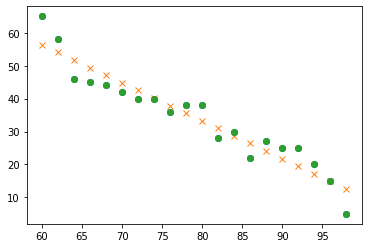

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]
line_fitter = LinearRegression()
line_fitter.fit(temperature, sales)
sales_predict = line_fitter.predict(temperature)
plt.plot(temperature, sales, 'o')
plt.plot(temperature, sales_predict, 'x')
plt.plot(temperature, sales, 'o')
plt.show()